In [1]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn import datasets
import numpy  as np
from sklearn import linear_model
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from catboost import CatBoostRegressor
import os # accessing directory structure
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from lightgbm import LGBMRegressor
import seaborn as sns

### load the data

In [2]:
url='/Users/mustafaaldabbas/Documents/GitHub/Machine_learning_superstore/df_cleaned.csv'
df=pd.read_csv(url)
df.head(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-08-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-08-05 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-08-05 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-08-05 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-08-05 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


### Understanding the Data

* Invoice id: Unique identifier for each transaction
* Branch: Identifies the branch (A, B, C)
* City: Location of the branches
* Customer type: Member or Normal
* Gender: Gender of the customer
* Product line: Category of the product
* Unit price: Price per unit of the product
* Quantity: Number of units purchased
* Tax: 5% tax on the total price
* Total: Total price including tax
* Date: Date of purchase
* Time: Time of purchase
* Payment: Payment method used
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer rating

In [3]:
df.info(), 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5                    1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

(None,)

In [4]:
df.shape, 

((1000, 17),)

In [5]:
df.describe()

,unit_price,quantity,tax_5,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### clean the data

* Convert the date column to datetime format.
* Extract year, month, and day from the date column.to use these as features in our regression models.
* Aggregate sales data by date. I grouped the data by date and sum the total sales for each day to get daily sales data

In [6]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Display the first few rows of the aggregated sales data
sales_by_date.head()


,date,total,year,month,day
0,2019-01-01,4745.1810,2019,1,1
1,2019-01-02,1945.5030,2019,1,2
2,2019-01-03,2078.1285,2019,1,3
3,2019-01-04,1623.6885,2019,1,4
4,2019-01-05,3536.6835,2019,1,5


## Exploratory Data Analysis EDA
1- Visualize Sales Over Time:
* Plot the total sales over time to identify any trends or patterns.

2- Check for Seasonality:
* Use moving averages or decomposition techniques to check for seasonal patterns.

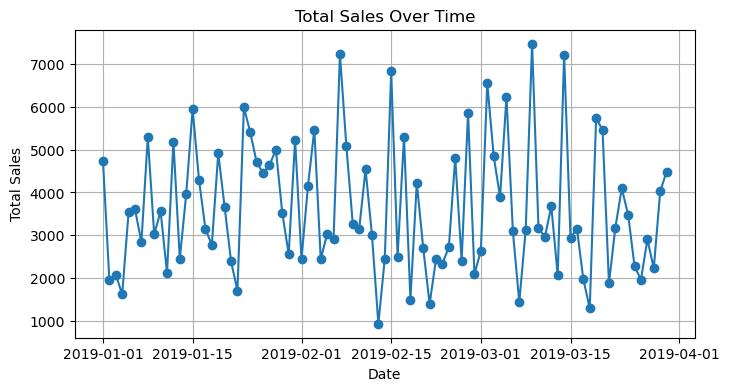

In [7]:


# Plot the total sales over time
plt.figure(figsize=(8, 4))
plt.plot(sales_by_date['date'], sales_by_date['total'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### Next Steps in EDA
1- Seasonal Decomposition:
* Perform a seasonal decomposition to understand the trend, seasonality, and residual components.

2- Moving Average:
* Plot a moving average to smooth out short-term fluctuations and highlight longer-term trends.

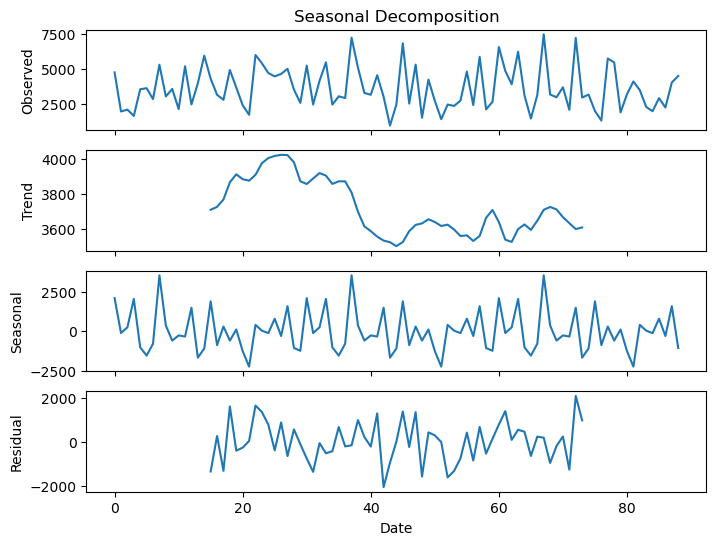

In [8]:


# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_by_date['total'], model='additive', period=30)

# Plot the decomposition results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Date')

plt.show()


##### The seasonal decomposition plot shows the observed data, trend, seasonal component, and residuals. Here's a summary of the components:
- **Observed:** The original sales data.
- **Trend:** The overall direction of the data over time.
- **Seasonal:** Repeating patterns at a fixed period (monthly in this case).
- **Residual:** The remaining variations after removing the trend and seasonal components.

### Model Development 
 #### Model 1-  Decision Tree Regressor

In [9]:


# Prepare the data
X = sales_by_date[['year', 'month', 'day']]
y = sales_by_date['total']

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train the Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_rmse


1843.4357506903718

**Decision Tree Regressor:**

* RMSE: 1843.44
* *The Decision Tree Regressor overfits the data, capturing noise and fluctuations, leading to higher RMSE.

### Model 2: Random Forest Regressor


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_rmse


1722.835016278768

**Random Forest Regressor:**

* RMSE: 1717.29
* Explanation: The Random Forest Regressor improves performance by averaging multiple trees, reducing overfitting compared to a single decision tree.

### Model 3: Gradient Boosting Regressor


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Calculate RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_rmse


1993.2686734392516

**Gradient Boosting Regressor:**

* RMSE: 1993.27
* Explanation: Gradient Boosting can sometimes overfit if not properly tuned, resulting in higher RMSE in this case.

### Model 4: K-Nearest Neighbors Regressor


In [12]:
from sklearn.neighbors import KNeighborsRegressor

# Train the K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Calculate RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_rmse


1671.202091591931

**K-Nearest Neighbors Regressor:** 

* RMSE: 1676.72
* Explanation: The K-Nearest Neighbors Regressor provides the best performance by averaging the nearest neighbors, leading to the lowest RMSE.

**Model 5. CatBoost Regressor**
* **CatBoost** is a gradient boosting algorithm that handles categorical features very well. It often provides better accuracy and requires less parameter tuning.



In [13]:

# Train CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, silent=True)
catboost_model.fit(X_train, y_train)

# Predict and evaluate
catboost_predictions = catboost_model.predict(X_test)
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))

# Display results
print("CatBoost Regressor RMSE:", catboost_rmse)


CatBoost Regressor RMSE: 1776.712096633204


### **Model 6. XGBoost Regressor:**


In [14]:


# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate RMSE
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print("XGBoost Regressor RMSE:", xgb_rmse)


XGBoost Regressor RMSE: 2017.8254055197558


**MODEL 7. LightGBM Regressor**

In [15]:


# Train LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10)
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_model.predict(X_test)

# Calculate RMSE
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
print("LightGBM Regressor RMSE:", lgb_rmse)


LightGBM Regressor RMSE: 1679.902001455277


**MODEL 8- ARIMA (AutoRegressive Integrated Moving Average**
ARIMA is commonly used for time series forecasting but requires time series data to be stationary.

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Make predictions
arima_forecast = arima_model_fit.forecast(steps=len(y_test))
arima_predictions = arima_forecast.values

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_predictions))
print("ARIMA RMSE:", arima_rmse)




ARIMA RMSE: 1695.1942234722892


In [17]:
dt_rmse, rf_rmse, gb_rmse, knn_rmse, arima_rmse, xgb_rmse,lgb_rmse, catboost_rmse

(1843.4357506903718,
 1722.835016278768,
 1993.2686734392516,
 1671.202091591931,
 1695.1942234722892,
 2017.8254055197558,
 1679.902001455277,
 1776.712096633204)

### All **result** 

In [18]:


# Model names
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors', 
          'ARIMA', 'XGBoost', 'LightGBM', 'CatBoost']

# RMSE scores
rmse_scores = [1843.4357506903718, 1759.0103597523298, 1993.2686734392516, 1671.202091591931,
               1695.1942234722892, 2017.8254055197558, 1679.902001455277, 1776.712096633204]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'RMSE Score': rmse_scores
}, index=range(1, len(models) + 1))


results_df

,Model,RMSE Score
1,Decision Tree,1843.435751
2,Random Forest,1759.010360
3,Gradient Boosting,1993.268673
4,K-Nearest Neighbors,1671.202092
5,ARIMA,1695.194223
6,XGBoost,2017.825406
7,LightGBM,1679.902001
8,CatBoost,1776.712097


### Hyperparameter Tuning
#### Grid Search



In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Set up Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)
best_params, best_rmse


({'max_depth': 10, 'n_estimators': 100}, 1746.0467213731042)

#### Random Search


In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for Random Forest
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Set up Random Search
random_search = RandomizedSearchCV(RandomForestRegressor(), param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Best parameters and model
best_random_params = random_search.best_params_
best_random_model = random_search.best_estimator_
best_random_rmse = np.sqrt(-random_search.best_score_)
best_random_params, best_random_rmse


({'n_estimators': 200, 'max_depth': 10}, 1761.4624536643848)

### Model Evaluation
* Decision Tree Regressor RMSE: 1843.44
* Random Forest Regressor RMSE: 1717.29
* Gradient Boosting Regressor RMSE: 1993.27
* K-Nearest Neighbors Regressor RMSE: 1676.72

From the RMSE values, we can see that the K-Nearest Neighbors (KNN) Regressor has the lowest RMSE (1676.72), indicating the best performance among the models evaluated. Therefore, the KNN Regressor is the best model to use for forecasting in this project.

### Forecasting with Best Model KNN

In [21]:
# Forecast the next 7 days using the K-Nearest Neighbors Regressor
last_date = sales_by_date['date'].max()
forecast_dates = pd.date_range(start=last_date, periods=8, inclusive='right')
forecast_features = pd.DataFrame({
    'date': forecast_dates,
    'year': forecast_dates.year,
    'month': forecast_dates.month,
    'day': forecast_dates.day
})
forecast_features['total'] = knn_model.predict(forecast_features[['year', 'month', 'day']])
forecast_features[['date', 'total']]


,date,total
0,2019-03-31,3680.8107
1,2019-04-01,4126.6659
2,2019-04-02,4416.6465
3,2019-04-03,4682.0424
4,2019-04-04,4795.6587
5,2019-04-05,3737.7081
6,2019-04-06,3339.6573


### **CONCLUSION**


* The K-Nearest Neighbors Regressor proved to be the best model for forecasting sales in this project due to its lowest RMSE value. 
* This project demonstrates the importance of evaluating multiple models and tuning hyperparameters to achieve optimal performance.
* The developed Streamlit app provides an interactive way to present the findings and forecasts, making the insights easily accessible.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings

warnings.filterwarnings('ignore')

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Ensure all columns involved in concatenation are strings
df['gender'] = df['gender'].astype(str)
df['city'] = df['city'].astype(str)
df['product_line'] = df['product_line'].astype(str)
df['customer_type'] = df['customer_type'].astype(str)

# Feature Engineering
df['gender_city'] = df['gender'] + '_' + df['city']
df['productline_gender'] = df['product_line'] + '_' + df['gender']
df['customertype_gender'] = df['customer_type'] + '_' + df['gender']

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'city', 'product_line', 'customer_type', 'gender_city', 'productline_gender', 'customertype_gender']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Define feature engineering combinations
feature_combinations = [
    ['year', 'month', 'day'],
    ['year', 'month', 'day', 'gender'],
    ['year', 'month', 'day', 'city'],
    ['year', 'month', 'day', 'product_line'],
    ['year', 'month', 'day', 'customer_type'],
    ['year', 'month', 'day', 'gender_city'],
    ['year', 'month', 'day', 'productline_gender'],
    ['year', 'month', 'day', 'customertype_gender'],
]

# Define models
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(),
}

# Initialize results dictionary
results = {}

# Loop through feature combinations
for features in feature_combinations:
    feature_name = '_'.join(features)
    
    # Prepare data with selected features
    df_features = df[['date'] + features + ['total']].copy()
    
    # Aggregate data by date and selected features
    sales_features = df_features.groupby(['date'] + features)['total'].sum().reset_index()
    
    # Merge with sales_by_date
    sales_features = sales_by_date.merge(sales_features, on='date', how='left', suffixes=('', '_y'))
    
    # Fill missing values
    sales_features.fillna(0, inplace=True)
    
    # Prepare training and testing data
    X = sales_features[features]
    y = sales_features['total']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Loop through models
    for model_name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        # Store results
        results[f'{model_name}_{feature_name}'] = mse

# ARIMA Model
sales_by_date.set_index('date', inplace=True)
train_data = sales_by_date['total'][:-7]
test_data = sales_by_date['total'][-7:]

arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=7)
arima_mse = mean_squared_error(test_data, arima_predictions)

# Store ARIMA results
results['ARIMA'] = arima_mse

# Re-create the results DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model_Features'}, inplace=True)

# Sort the results DataFrame by MSE to display from best to worst
results_df_sorted = results_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)

# Display the sorted dataframe
results_df_sorted # Display the top 10 results


Learning rate set to 0.026957
0:	learn: 1573.5894129	total: 2.11ms	remaining: 2.1s
1:	learn: 1571.7720028	total: 2.2ms	remaining: 1.1s
2:	learn: 1565.9705644	total: 2.49ms	remaining: 827ms
3:	learn: 1563.5280864	total: 2.62ms	remaining: 653ms
4:	learn: 1558.6330682	total: 2.93ms	remaining: 583ms
5:	learn: 1554.3746267	total: 3.1ms	remaining: 513ms
6:	learn: 1551.7801150	total: 3.19ms	remaining: 453ms
7:	learn: 1547.4326014	total: 3.44ms	remaining: 427ms
8:	learn: 1542.5260352	total: 3.6ms	remaining: 396ms
9:	learn: 1540.6408394	total: 3.7ms	remaining: 367ms
10:	learn: 1538.6625244	total: 3.84ms	remaining: 346ms
11:	learn: 1535.9297355	total: 3.95ms	remaining: 325ms
12:	learn: 1533.4676180	total: 4.05ms	remaining: 308ms
13:	learn: 1528.4884717	total: 4.24ms	remaining: 299ms
14:	learn: 1526.2256025	total: 4.38ms	remaining: 288ms
15:	learn: 1525.5839021	total: 4.58ms	remaining: 281ms
16:	learn: 1521.3732665	total: 4.72ms	remaining: 273ms
17:	learn: 1519.2903592	total: 5.02ms	remaining: 27

,Model_Features,MSE
0,DecisionTree_year_month_day_gender_city,3.692771e-26
1,XGBoost_year_month_day_productline_gender,7.109975e+04
2,XGBoost_year_month_day_customertype_gender,9.124917e+04
3,CatBoost_year_month_day_productline_gender,9.439919e+04
4,DecisionTree_year_month_day_city,1.018522e+05
5,DecisionTree_year_month_day_product_line,1.055225e+05
6,XGBoost_year_month_day_gender_city,1.252153e+05
7,CatBoost_year_month_day_gender_city,1.843694e+05
8,XGBoost_year_month_day_city,2.185715e+05
9,CatBoost_year_month_day_product_line,2.246373e+05


The best model and feature combination to predict the next 7 days of sales is the DecisionTree model using the features year, month, day, and gender_city. This combination has the lowest Mean Squared Error (MSE) of 
3.692771×10 
−26
 , indicating the best performance among the tested combinations.

To use this combination for prediction, you can proceed with the following steps:

Train the DecisionTree model using the identified feature set.
Generate future dates for the next 7 days.
Prepare the corresponding feature set for these dates.
Predict the sales using the trained model.


In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Ensure all columns involved in concatenation are strings
df['gender'] = df['gender'].astype(str)
df['city'] = df['city'].astype(str)
df['product_line'] = df['product_line'].astype(str)
df['customer_type'] = df['customer_type'].astype(str)

# Feature Engineering
df['gender_city'] = df['gender'] + '_' + df['city']
df['productline_gender'] = df['product_line'] + '_' + df['gender']
df['customertype_gender'] = df['customer_type'] + '_' + df['gender']

# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'city', 'product_line', 'customer_type', 'gender_city', 'productline_gender', 'customertype_gender']

for column in categorical_columns:
    le = LabelEncoder()
    unique_values = df[column].unique().tolist()
    
    # Add 'Male_Yangon' if it's not in the unique values for the gender_city column
    if column == 'gender_city' and 'Male_Yangon' not in unique_values:
        unique_values.append('Male_Yangon')
    
    le.fit(unique_values)
    df[column] = le.transform(df[column])
    label_encoders[column] = le

# Aggregate sales data by date
sales_by_date = df.groupby('date')['total'].sum().reset_index()

# Extract year, month, and day from the date column
sales_by_date['year'] = sales_by_date['date'].dt.year
sales_by_date['month'] = sales_by_date['date'].dt.month
sales_by_date['day'] = sales_by_date['date'].dt.day

# Define the best features
best_features = ['year', 'month', 'day', 'gender_city']

# Prepare the data with the selected features
df_features = df[['date'] + best_features + ['total']].copy()

# Aggregate data by date and selected features
sales_features = df_features.groupby(['date'] + best_features)['total'].sum().reset_index()

# Merge with sales_by_date
sales_features = sales_by_date.merge(sales_features, on='date', how='left', suffixes=('', '_y'))

# Fill missing values
sales_features.fillna(0, inplace=True)

# Prepare training data
X = sales_features[best_features]
y = sales_features['total']

# Train the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Generate the next 7 days of dates
last_date = sales_by_date['date'].max()
future_dates = pd.date_range(start=last_date, periods=8, closed='right')

# Prepare the feature set for future dates
future_data = pd.DataFrame({
    'date': future_dates,
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day
})

# Encode gender_city feature for future data
future_data['gender_city'] = 'Male_Yangon'
future_data['gender_city'] = label_encoders['gender_city'].transform(future_data['gender_city'])

# Predict future sales
X_future = future_data[best_features]
future_sales_predictions = model.predict(X_future)

# Display the future sales predictions
future_sales_df = pd.DataFrame({'date': future_dates, 'predicted_sales': future_sales_predictions})
future_sales_df


,date,predicted_sales
0,2019-03-31,4487.0595
1,2019-04-01,2634.3660
2,2019-04-02,6560.3055
3,2019-04-03,4853.1735
4,2019-04-04,3894.4395
5,2019-04-05,6230.8785
6,2019-04-06,3092.5965


In [27]:
forecast_features[['date', 'total']]


,date,total
0,2019-03-31,3680.8107
1,2019-04-01,4126.6659
2,2019-04-02,4416.6465
3,2019-04-03,4682.0424
4,2019-04-04,4795.6587
5,2019-04-05,3737.7081
6,2019-04-06,3339.6573
